#### Ejercicio 1

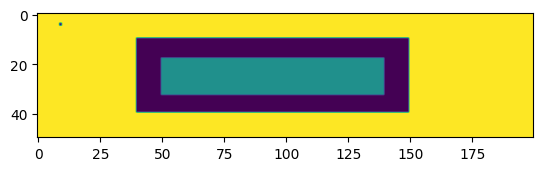

In [17]:
import numpy as np
import matplotlib.pyplot as plt

alto = 50
ancho = 200

array = np.zeros((alto, ancho))

array[4,9] = 1
array[10:40, 40:150] = 1

array[18:33, 50:140] = 0.5

plt.imshow(-array)
plt.show()



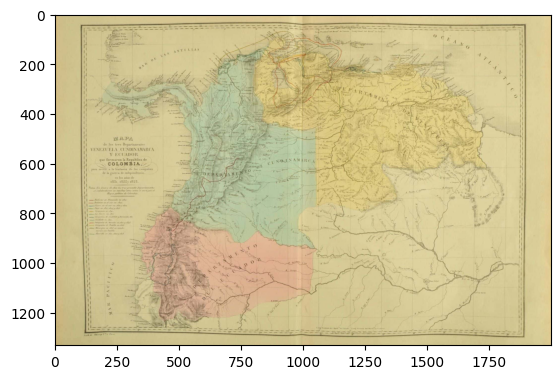

In [18]:
img_tmp = plt.imread('./mapa.jpg')
plt.imshow(img_tmp)
plt.show()

In [22]:
img_tmp.shape

(1332, 1998, 3)

In [24]:
img_tmp[175,250]

array([203, 191, 143], dtype=uint8)

In [25]:
img_tmp.max(), img_tmp.min()

(255, 4)

(1332, 1998)


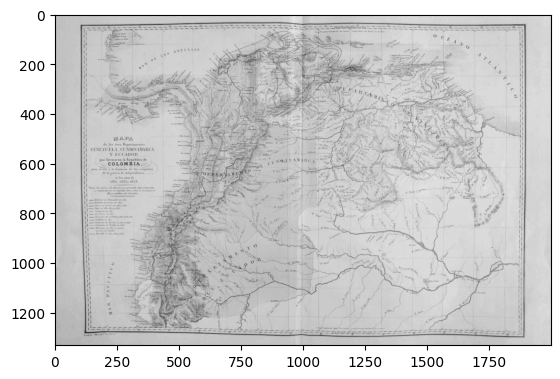

In [30]:
import cv2

img_tmp_cv = cv2.imread('./mapa.jpg',0)
print(img_tmp_cv.shape)
plt.imshow(img_tmp_cv, cmap="gray")
plt.show()

In [44]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

img_resized = np.reshape(img_tmp_cv, (1, img_tmp_cv.shape[0], img_tmp_cv.shape[1], 1))
print(img_resized.shape)


img = img_tmp
imgs = {}
h, w, _ = img_tmp.shape
print(h,w)

input_img = Input(shape=(h, w, 1))


x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)
modelo1 = Model(input_img, x)

modelo1.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0], dtype=np.float32)])

imgs['treshold50']= modelo1.predict(img_resized)


(1, 1332, 1998, 1)
1332 1998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


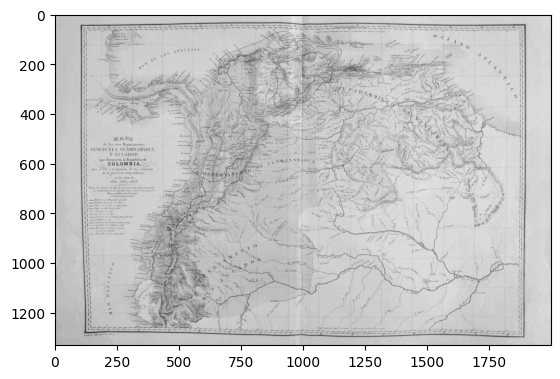

In [45]:
plt.imshow(imgs['treshold50'][0,:,:,0], cmap="gray")
plt.show()

#### Threeshold

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


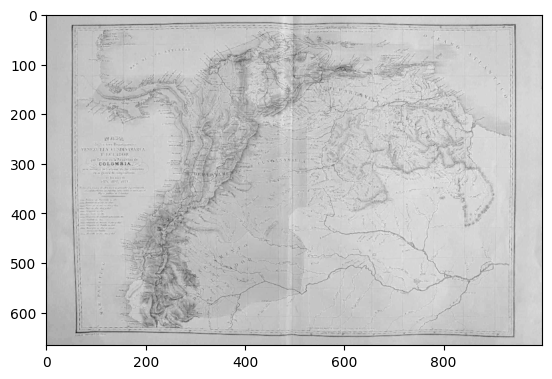

In [50]:
x = Conv2D(1, (1, 1), activation='relu', padding='same')(input_img)
x= MaxPooling2D((2, 2), padding='same')(x)
modelo2 = Model(input_img, x)

modelo2.set_weights([np.array([[[[100.0]]]], dtype=np.float32), np.array([-50.0], dtype=np.float32)])

plt.imshow(modelo2.predict(img_resized)[0,:,:,0], cmap="gray")
plt.show()

### Ejercicio de clase 2 filtros

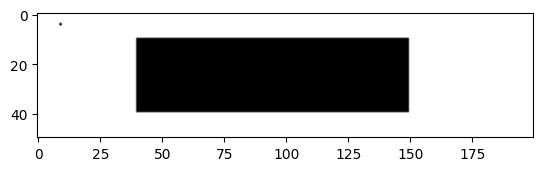

(50, 200)
arreglo 2 2 2 (2, 2, 1, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


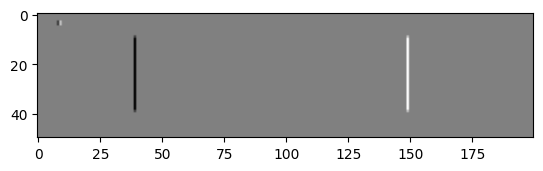

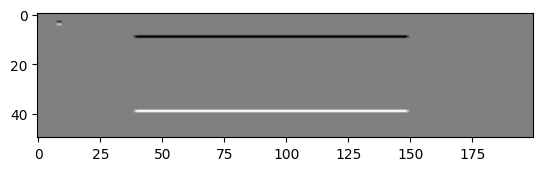

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

alto = 50
ancho = 200

array = np.zeros((alto, ancho))

array[4,9] = 1
array[10:40, 40:150] = 1

#array[18:33, 50:140] = 0.5

plt.imshow(-array, cmap="gray")
plt.show()

h, w = array.shape
input_img2 = Input(shape=(h, w, 1))

print(array.shape)


x= Conv2D(2,(2,2), activation='linear', padding='same')(input_img2)
modelo3 = Model(input_img2, x)

filtro1 = [[1, -1],[1, -1]]
filtro2 = [[1, 1],[-1, -1]]

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

filtros = reformar_filtros([filtro1, filtro2])

modelo3.set_weights([filtros, np.array([0,0], dtype=np.float32)])

img_resized2 = np.reshape(array, (1, array.shape[0], array.shape[1], 1))
img_temp4 = modelo3.predict(img_resized2)

img_conv1a = np.reshape(img_temp4[0,:,:,0], (img_temp4.shape[1], img_temp4.shape[2]))
img_conv1b = np.reshape(img_temp4[0,:,:,1], (img_temp4.shape[1], img_temp4.shape[2]))

plt.imshow(img_conv1a, cmap="gray")
plt.show()

plt.imshow(img_conv1b, cmap="gray")
plt.show()


#### Ejercicio 3 filtros

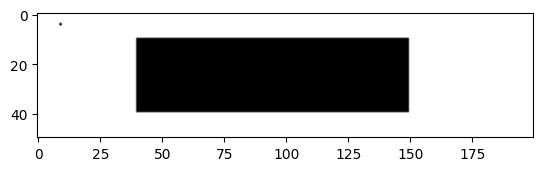

(50, 200)
arreglo 3 3 3 (3, 3, 1, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


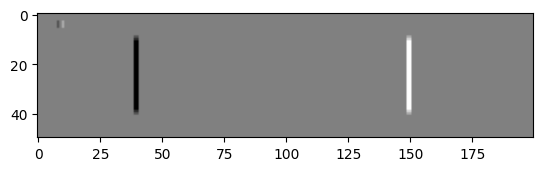

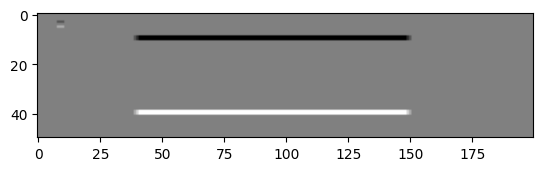

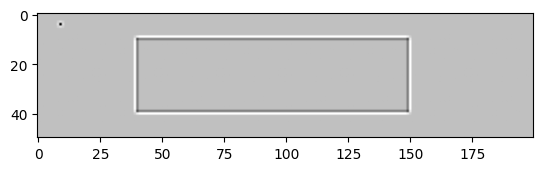

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

alto = 50
ancho = 200

array = np.zeros((alto, ancho))

array[4,9] = 1
array[10:40, 40:150] = 1

#array[18:33, 50:140] = 0.5

plt.imshow(-array, cmap="gray")
plt.show()

h, w = array.shape
input_img2 = Input(shape=(h, w, 1))

print(array.shape)


x= Conv2D(3,(3,3), activation='linear', padding='same')(input_img2)
modelo4 = Model(input_img2, x)

filtro1 = [[1, 0, -1],[1, 0, -1], [1, 0, -1]]
filtro2 = [[1, 1, 1],[0, 0, 0], [-1, -1, -1]]
filtro3 = [[1, 2, 1],[2, -12, 2], [1, 2, 1]]

def reformar_filtros(filtros):
  l=len(filtros)
  m=len(filtros[0])
  n=len(filtros[0][0])
  salida=np.zeros((m,n,1,l))
  print('arreglo',l,n,m,salida.shape)
  for i in range(l):
    for j in range(m):
      for k in range(n):
        #print('ijk',i,j,k,filtros[i][j][k])
        salida[j,k,0,i]=filtros[i][j][k]
  return salida

filtros = reformar_filtros([filtro1, filtro2, filtro3])

modelo4.set_weights([filtros, np.array([0,0,0], dtype=np.float32)])

img_resized2 = np.reshape(array, (1, array.shape[0], array.shape[1], 1))
img_temp4 = modelo3.predict(img_resized2)

img_conv1a = np.reshape(img_temp4[0,:,:,0], (img_temp4.shape[1], img_temp4.shape[2]))
img_conv1b = np.reshape(img_temp4[0,:,:,1], (img_temp4.shape[1], img_temp4.shape[2]))
img_conv1c = np.reshape(img_temp4[0,:,:,2], (img_temp4.shape[1], img_temp4.shape[2]))

plt.imshow(img_conv1a, cmap="gray")
plt.show()

plt.imshow(img_conv1b, cmap="gray")
plt.show()

plt.imshow(img_conv1c, cmap="gray")
plt.show()
